In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_parquet('C:/Users/magha/OneDrive/Desktop/Home Credit EDA/home_credit_joined.parquet')
df

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,AMT_CREDIT_SUM,AMT_ANNUITY,AMT_PAYMENT,AMT_DRAWINGS_CURRENT,MONTHS_BALANCE
0,100002,1,202500.0,Secondary / secondary special,108131.945625,9251.775000,11559.247105,NaN,19.0
1,100003,0,270000.0,Higher education,254350.125000,56553.990000,64754.586000,NaN,28.0
2,100004,0,67500.0,Secondary / secondary special,94518.900000,5357.250000,7096.155000,NaN,4.0
3,100006,0,135000.0,Secondary / secondary special,NaN,23651.175000,62947.088438,0.0,21.0
4,100007,0,121500.0,Secondary / secondary special,146250.000000,12278.805000,12214.060227,NaN,66.0
...,...,...,...,...,...,...,...,...,...
307506,456251,0,157500.0,Secondary / secondary special,NaN,6605.910000,7492.924286,NaN,9.0
307507,456252,0,72000.0,Secondary / secondary special,NaN,10074.465000,10069.867500,NaN,7.0
307508,456253,0,153000.0,Higher education,990000.000000,4770.405000,4115.915357,NaN,17.0
307509,456254,1,171000.0,Secondary / secondary special,45000.000000,10681.132500,10239.832895,NaN,20.0


In [ ]:
# loan appications = df[df['SK_ID_CURR'].notnull()]
len(df)

307511

In [5]:
df['SK_ID_CURR'].nunique()

307511

In [8]:
#Question: What is the overall default rate for all applications?
df['TARGET'].mean()

np.float64(0.08072881945686496)

In [12]:
#Question: How many applications fall into each category: "Defaulted" vs. "Repaid"?
df['TARGET'].value_counts().rename(index={0: 'Repaid', 1: 'Defaulted'})

TARGET
Repaid       282686
Defaulted     24825
Name: count, dtype: int64

In [13]:
# distribution of loan types (NAME_CONTRACT_TYPE)?
df['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

In [24]:
#Question: How does the default rate differ between Cash loans and Revolving loans?
df[['NAME_EDUCATION_TYPE', 'TARGET']].groupby(['NAME_EDUCATION_TYPE','TARGET']).mean()

C:\Users\magha\AppData\Local\Temp\ipykernel_20296\2662623751.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['NAME_EDUCATION_TYPE', 'TARGET']].groupby(['NAME_EDUCATION_TYPE','TARGET']).mean()


Empty DataFrame
Columns: []
Index: [(Academic degree, 0), (Academic degree, 1), (Higher education, 0), (Higher education, 1), (Incomplete higher, 0), (Incomplete higher, 1), (Lower secondary, 0), (Lower secondary, 1), (Secondary / secondary special, 0), (Secondary / secondary special, 1)]

In [36]:
df1 = pd.read_csv(r'C:\Users\magha\OneDrive\Desktop\Home Credit EDA\data\application_train.csv')

In [37]:
df1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Question: What is the distribution of applicants by gender?
df1['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [39]:
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
#age distribution of all applicants
df["AGE"] = (-df1['DAYS_BIRTH'])//365

In [ ]:
df['AGE']

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: AGE, Length: 307511, dtype: int64

In [ ]:
#Question: How does the default rate trend across different age groups (e.g., 20-30, 30-40, etc.)?
# Define age bins and labels
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# Create age group column
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=False)

# Calculate default rate by age group
default_rate_by_age = df.groupby('AGE')['TARGET'].mean()*100
print(default_rate_by_age)

AGE
20     0.000000
21    11.323764
22    13.672008
23    12.866650
24    11.037132
25    10.076775
26    10.436308
27    11.892402
28    11.222571
29    11.212516
30    11.068409
31    10.672078
32     9.493111
33    10.098522
34    10.077316
35     9.495131
36     9.507778
37     8.944198
38     8.576581
39     8.209806
40     8.093692
41     8.190318
42     7.339338
43     7.522870
44     8.146822
45     7.647467
46     7.568902
47     7.153035
48     7.373998
49     7.318545
50     7.034866
51     6.951712
52     6.993938
53     6.343033
54     6.277314
55     5.499473
56     5.785003
57     5.437352
58     5.216975
59     5.685417
60     4.930143
61     5.647841
62     5.386289
63     5.349240
64     5.120188
65     4.272406
66     3.117506
67     4.064643
68     2.424942
69     0.000000
Name: TARGET, dtype: float64


In [61]:
df1['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Question: What is the default rate for different family statuses (NAME_FAMILY_STATUS)?
df1.groupby('NAME_FAMILY_STATUS')['TARGET'].mean()

NAME_FAMILY_STATUS
Civil marriage          0.099446
Married                 0.075599
Separated               0.081942
Single / not married    0.098077
Unknown                 0.000000
Widow                   0.058242
Name: TARGET, dtype: float64


In [71]:
#Question: What is the breakdown of applicants by their highest level of education (NAME_EDUCATION_TYPE)?
df1['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

In [72]:
#Question: Is there a correlation between education level and default rate?
df1.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean()

NAME_EDUCATION_TYPE
Academic degree                  0.018293
Higher education                 0.053551
Incomplete higher                0.084850
Lower secondary                  0.109277
Secondary / secondary special    0.089399
Name: TARGET, dtype: float64

In [73]:
#Question: What is the distribution of loan amounts (AMT_CREDIT)?
df1['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [77]:
#Question: What is the distribution of loan amounts (AMT_CREDIT)?
df1['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [79]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 6.4 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.1 MB 6.8 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/8.1 MB 6.0 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/8.1 MB 5.4 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 5.1 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 5.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------- ----------- 1.6/2.2 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 7.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Matplotlib is building the font cache; this may take a moment.


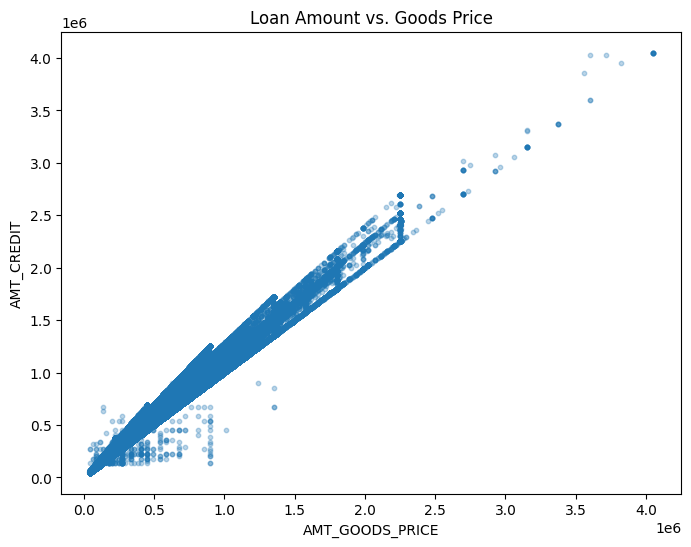

Proportion of loans where AMT_CREDIT > AMT_GOODS_PRICE: 64.64%


In [80]:
#Question: Is there a relationship between the loan amount (AMT_CREDIT) and the price of the goods the loan is for (AMT_GOODS_PRICE)?
# Visualize the relationship between loan amount and goods price
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df1['AMT_GOODS_PRICE'], df1['AMT_CREDIT'], alpha=0.3, s=10)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('Loan Amount vs. Goods Price')
plt.show()

# Calculate the proportion of loans where AMT_CREDIT > AMT_GOODS_PRICE
proportion = (df1['AMT_CREDIT'] > df1['AMT_GOODS_PRICE']).mean()
print(f"Proportion of loans where AMT_CREDIT > AMT_GOODS_PRICE: {proportion:.2%}")

In [81]:
#Question: What are the most common income types (NAME_INCOME_TYPE) for applicants?
df1['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [ ]:
#Question: Which income types have the highest and lowest default rates?
df1.groupby('NAME_INCOME_TYPE')['TARGET'].mean().sort_values(ascending=False)

NAME_INCOME_TYPE
Maternity leave         0.400000
Unemployed              0.363636
Working                 0.095885
Commercial associate    0.074843
State servant           0.057550
Pensioner               0.053864
Businessman             0.000000
Student                 0.000000
Name: TARGET, dtype: float64